<a href="https://colab.research.google.com/github/hahdawg/gbmclass/blob/master/rossmann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

In [0]:
def load_data():

  res = pd.read_csv("https://github.com/hahdawg/gbmclass/raw/master/rossmann.csv")
  res["date"] = pd.to_datetime(res["date"], format="%Y-%m-%d")
  res = res.loc[res["date"] >= "1/1/2014"]
  
  holiday_dummies = pd.get_dummies(res["stateholiday"])
  holiday_dummies = holiday_dummies*np.arange(1, holiday_dummies.shape[1] + 1)
  holiday_dummies = holiday_dummies.max(axis=1) - 1
  res["stateholiday"] = holiday_dummies
  return res

In [0]:
def compute_model_data(data):
  columns = ["sales", "open", "promo", "stateholiday", "schoolholiday"]
  pivot = pd.pivot_table(data, index="store", columns="date")
  res = {c: pivot[c] for c in columns}
  return res

In [0]:
model_data = compute_model_data(data)

In [36]:
data.schoolholiday.mean()

0.178783227516919

In [30]:
sales.iloc[:5, :5]

date,2014-01-01 00:00:00,2014-01-02 00:00:00,2014-01-03 00:00:00,2014-01-04 00:00:00,2014-01-05 00:00:00
store,,,,,
25,0.0,10367.0,8774.0,7425.0,0.0
35,0.0,6826.0,8096.0,7541.0,0.0
42,0.0,8478.0,9219.0,8230.0,0.0
57,0.0,10821.0,10430.0,7825.0,0.0
64,0.0,9033.0,9220.0,9514.0,0.0


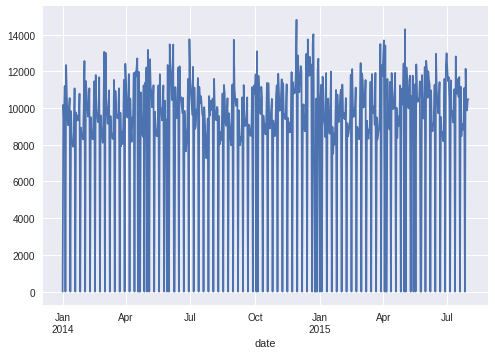

In [31]:
sales.iloc[6, :].plot()